### In this lab, we will practice for Naive Bayes, Cross Validation, KNN, Entropy and Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sb
from statistics import mean 

We will use the dataset "heart_disease_dataset.csv" to practice Naive Bayes classifier in python. There are 3 columns in the dataset, age, cholesterol and whether or not a patient has heart disease. You will use age and cholesterol to predict heart disease. 

In [2]:
heart_disease = pd.read_csv(filepath_or_buffer='heart_disease_dataset.csv')
heart_disease.head(10)

,age,cholestrol,target
0,63,233,1
1,37,250,1
2,41,204,1
3,56,236,1
4,57,354,1
5,57,192,1
6,56,294,1
7,44,263,1
8,52,199,1
9,57,168,1


In [5]:
# # Get the counts of 0s and 1s in the 'target' column
# target_counts = heart_disease['target'].value_counts()

# # Display the counts
# print(target_counts)

In [6]:
# # Get the counts of 0s and 1s in the 'target' column
# target_counts = heart_disease['target'].value_counts()

# # Create a bar plot
# plt.figure(figsize=(8, 6))
# target_counts.plot(kind='bar', color=['blue', 'orange'])
# plt.title('Distribution of Heart Disease Targets')
# plt.xlabel('Target')
# plt.ylabel('Count')
# plt.xticks(rotation=0)
# plt.show()

In [39]:
# sb.pairplot(heart_disease)

1. Separate the original dataset to training set(75%) and testing set(25%), and train the Naive Bayes model with training data and test with the testing data, print out the accuracy rate. (10)

In [3]:
from sklearn.model_selection import train_test_split

x = heart_disease.drop(['target'], axis=1)  # features (all columns except 'target')
y = heart_disease['target'].values          # labels (values of the 'target' column)

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model= GaussianNB()  # model choice gausian naive
model.fit(x_train,y_train) # training 

y_pred= model.predict(x_test) # 
print("ACC:", metrics.accuracy_score(y_test, y_pred))

ACC: 0.5789473684210527


2. Instead of seperate training set and testing set, use K-fold cross validation to get the accuracy rate. Print all 10 accuracy score. (k = 10) (10)

In [5]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Performing cross-validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, x, y, cv=k_fold)


# Printing cross-validation scores for each fold
for i, score in enumerate(cv_scores):
    print(f"Cross-validation scores for k = {i+1}: {score}")
print("Average cross-validation accuracy:", cv_scores.mean())

Cross-validation scores for k = 1: 0.6129032258064516
Cross-validation scores for k = 2: 0.6774193548387096
Cross-validation scores for k = 3: 0.5806451612903226
Cross-validation scores for k = 4: 0.6
Cross-validation scores for k = 5: 0.6
Cross-validation scores for k = 6: 0.7
Cross-validation scores for k = 7: 0.5333333333333333
Cross-validation scores for k = 8: 0.5666666666666667
Cross-validation scores for k = 9: 0.5666666666666667
Cross-validation scores for k = 10: 0.5666666666666667
Average cross-validation accuracy: 0.6004301075268816


3. Explain whether we need to use Cross Validation to test the model.(10)

<span style = 'color:green'>
    
Testing the model using cross-validation is essential for several key reasons:
    
1. It yields a more accurate estimate of the model’s performance by **training and testing it on multiple datasets**, thereby **reducing the bias inherent in a single train-test split**. 
<br>
2. This method also **decreases the variance in performance metrics**, enhancing the robustness of the evaluation. 
<br>    
3. Additionally, cross-validation is effective in **detecting overfitting by exposing differences between the model’s performance on training and validation sets**. 
    
Although Naive Bayes models typically have fewer hyperparameters, **cross-validation is valuable for fine-tuning parameters**, such as the **smoothing parameter**, to ensure the **model’s robustness to unseen data**.

4. Use the same dataset. Train a KNN model with the data.(k = 7). Print the ACC score with K-fold cross validation, k = 7.(7)

In [6]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors = 7) 

k_fold = KFold(7) #K-Neighbor classifier

print("Average Acc: ", mean(cross_val_score(knn, x, y, cv = k_fold)))

Average Acc:  0.38893083660525524


5. Next, plot misclassification error vs neighbors, and find the best k and print it's acc score.(10) 

The optimal number of neighbors is 35 Its ACC score is: 0.6039784946236558


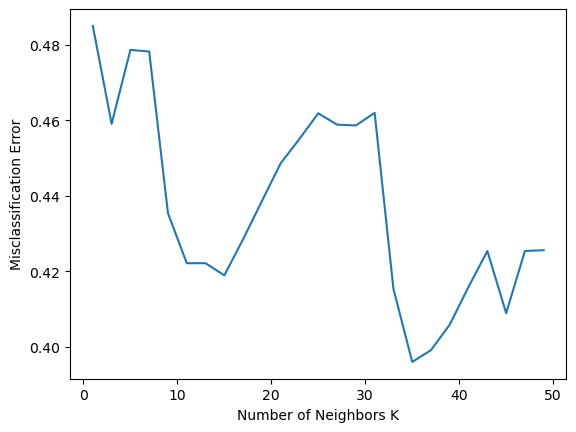

In [7]:
neighbors = list(range(1, 50, 2))
cv_scores = [] # where the scores will stored in. 

for k in neighbors: # k values will change w/ the values stored in 'neighbors'
    
    knn = KNeighborsClassifier(n_neighbors = k) # this is where 'k' is used
    scores = cross_val_score(knn, x, y, cv = 10, scoring = 'accuracy') # cross validation for score
    cv_scores.append(scores.mean()) # storing the mean of 'scores' into 'cv_scores'
    

mse = [1 - x for x in cv_scores]
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k), 
     "Its ACC score is: {}".format(cv_scores[mse.index(min(mse))]))

plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()  

6. Apply decision tree to the data, choose entropy as the criterion, max_depth = 2 (Use training set and testing set.) and print the ACC score.  (10)

In [11]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(criterion = "entropy", max_depth = 2) # applying DTC # (changed it to 1 since it yielded a acc score)
DTC.fit(x_train, y_train) # training the model
y_pred = DTC.predict(x_test)

print("Acc: ", metrics.accuracy_score(y_test, y_pred)) # the accuracy between y_test and y_pred

Acc:  0.5789473684210527


7. Print the tree.(10)

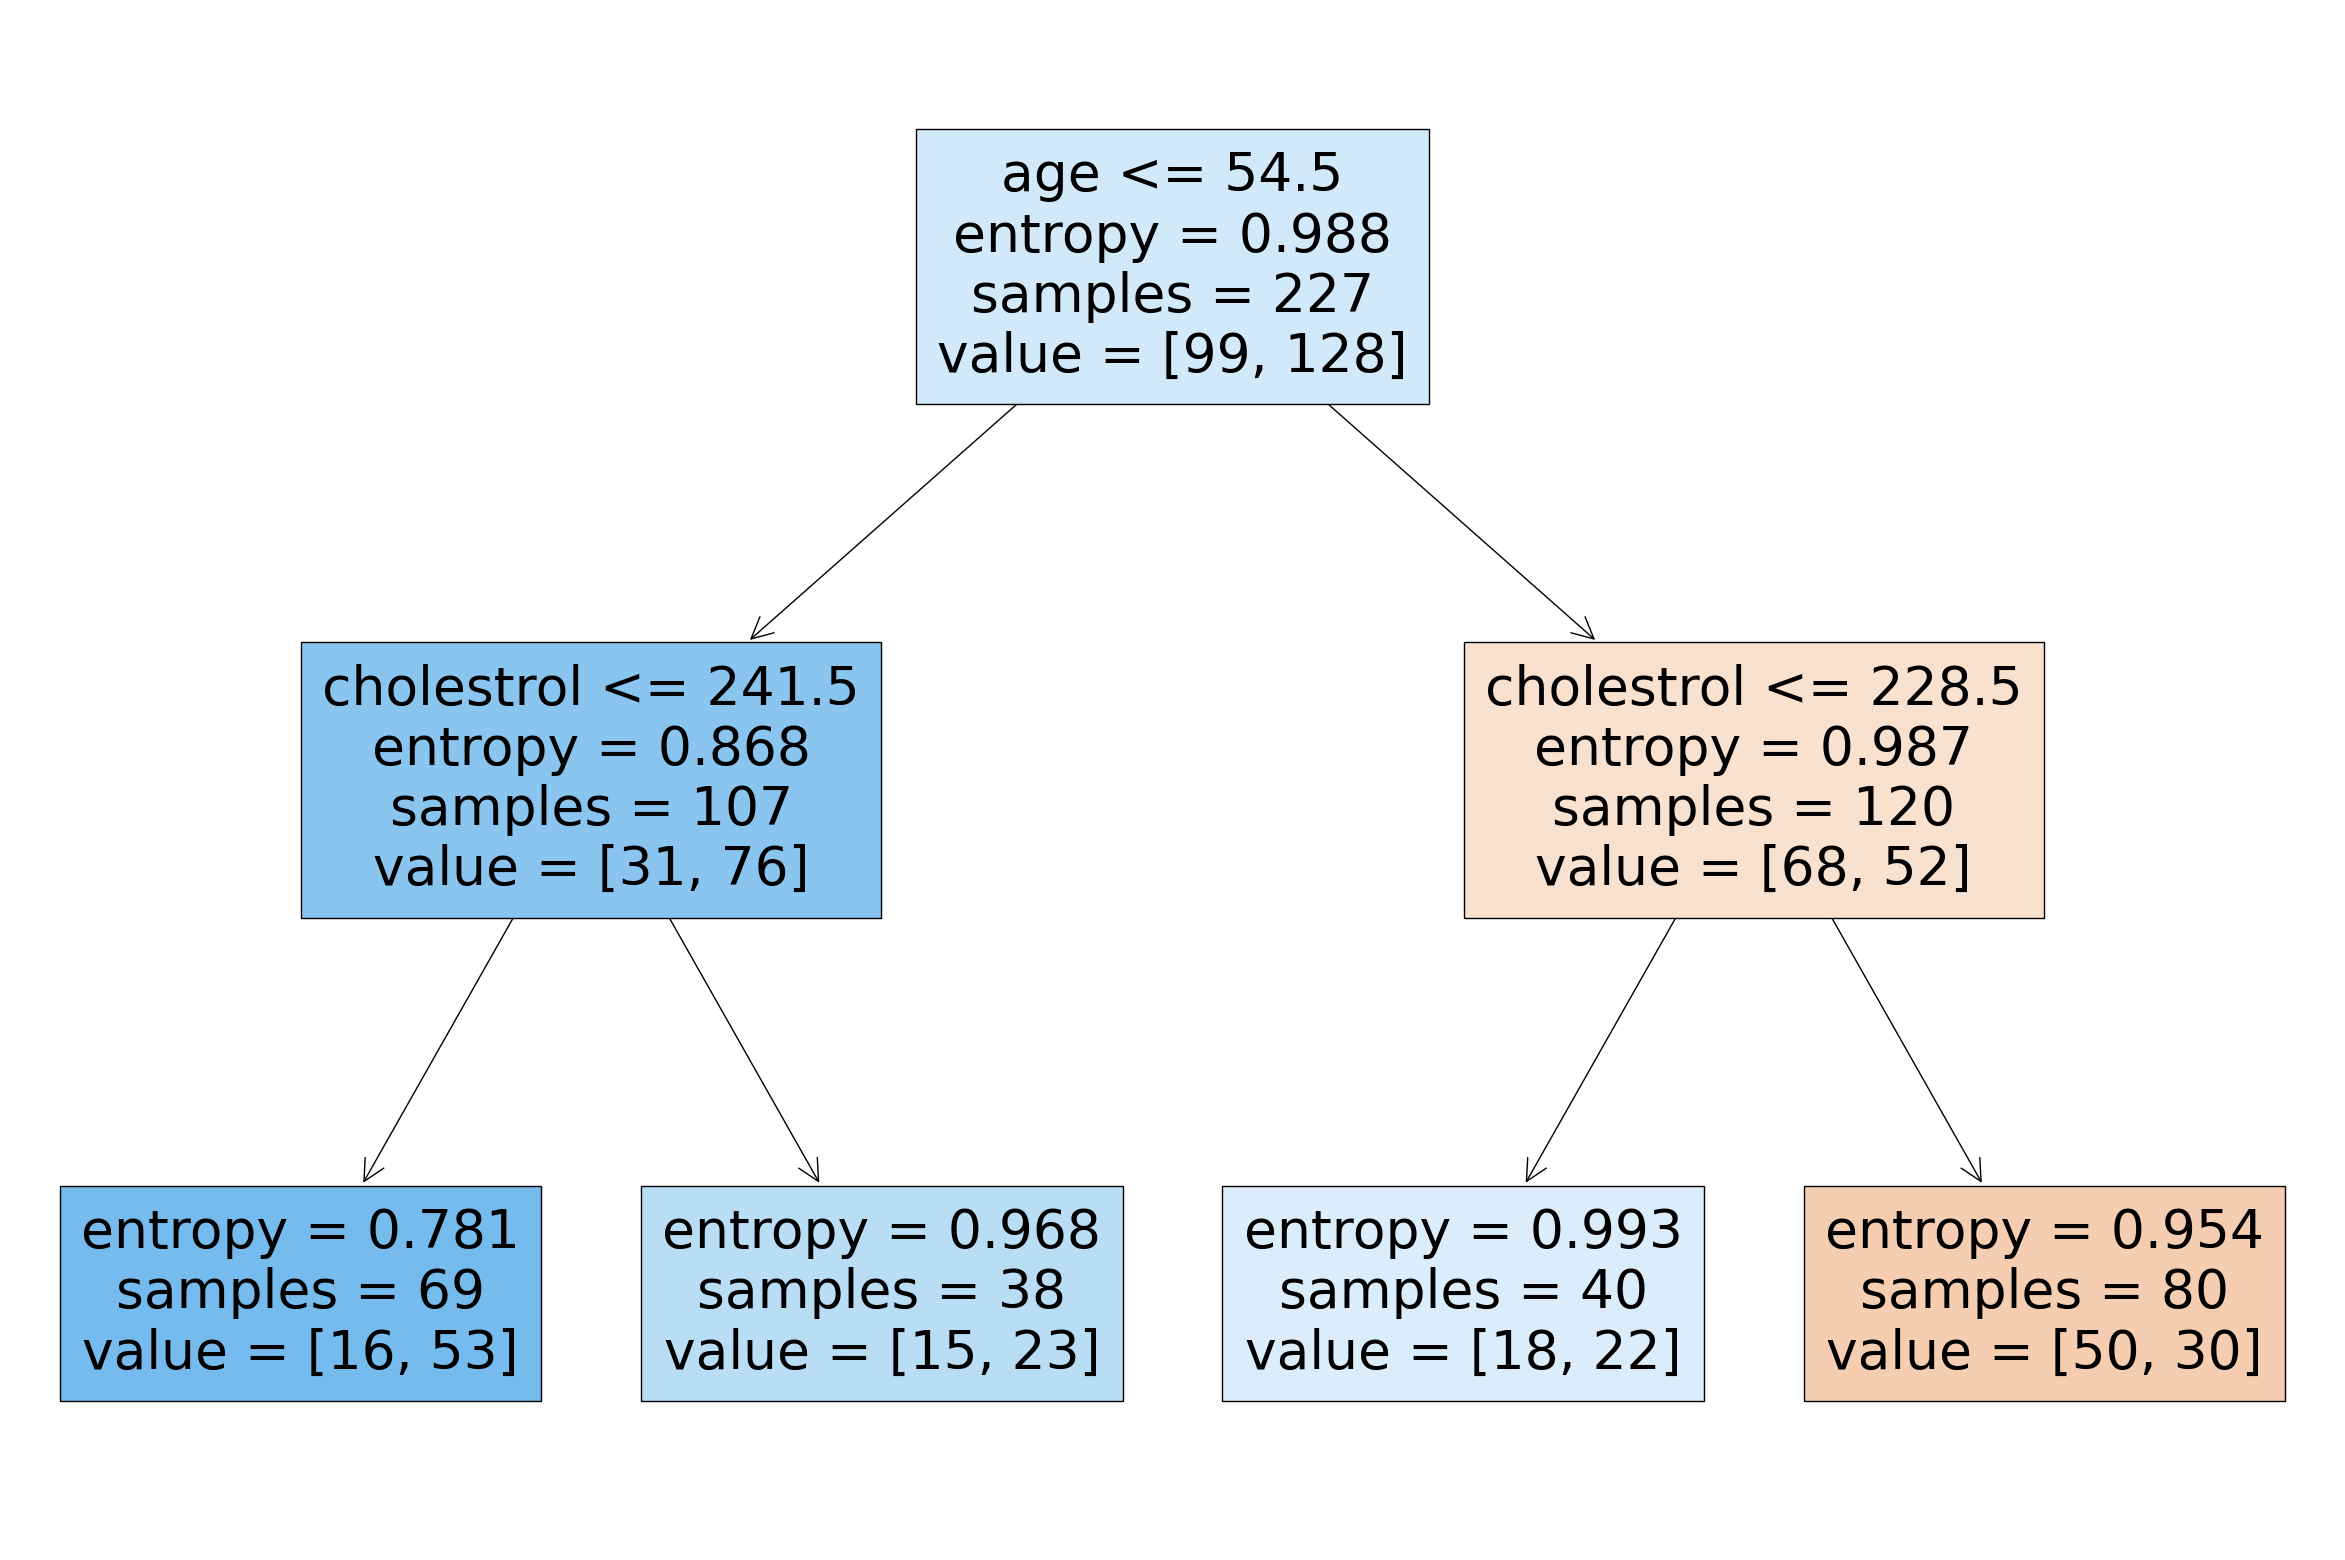

In [12]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (30,20))
tree = plot_tree(DTC,
                feature_names = list(x.columns), 
                filled = True)

8. Calculate the root's entropy and check whether your result is the same as the tree plot(use the equation from class only use numpy to do the calculation).(10)

In [13]:
from scipy.stats import entropy
import math


# manually

# root value value range (the values change with each new run )
p1 = 99/227
p2 = 128/227 

# calculate the entropy
H = -(p1 * math.log2(p1) + p2 * math.log2(p2))

print("H =", H)

######## 

# values from the root node 
values = np.array([99, 128])

# calculate probabilities
probabilities = values/np.sum(values)

base = 2 # log base 2 
H = entropy(probabilities, base = base)

print(f'entropy = {H}')

H = 0.9881947190623628
entropy = 0.9881947190623627


9. Calculate given age <= 62, what is the entropy for cholestrol <= 261, what is the IG, (use the equation from class only use numpy to do the calculation). (10)

In [17]:
import numpy as np

# entropy calculation function
def entropy(p):
    return -np.sum(p * np.log2(p))

# values for each node
values_root = np.array([99, 128]) # root
values_right = np.array([68, 52]) # right child node 
values_left = np.array([18, 22]) # right left childe node

# probabilities for each node
p_root = values_root / np.sum(values_root)
p_right = values_right / np.sum(values_right)
p_left = values_left / np.sum(values_left)

# entropies
H_root = entropy(p_root)
H_right = entropy(p_right)
H_left = entropy(p_left)

# information Gain
samples_root = 227 # root samples 
samples_right = 120 # right child samples 
samples_left = 40 # right left child samples 

IG = H_root - (samples_right / samples_root * H_right + samples_left / samples_root * H_left)

# H_root, H_right, H_left, IG
print(f'the roots entropy is: {H_root}')
# print(f'the roots right child entropy is: {H_right}') # this is the ages who are greater than 53.5 but we want ages <= 62!
print(f'the entropy for ages <= 62 and whose cholesterol is <= 261 is: {H_left}')
print(f'the information gain is: {IG}')


the roots entropy is: 0.9881947190623628
the entropy for ages <= 62 and whose cholesterol is <= 261 is: 0.9927744539878083
the information gain is: 0.29142154248009544


10. Find the best max_depth in Decision Tree for entopy and Gini. If it's different, explain why.(10)

In [15]:
ACCs_Gini = []

for max_depth in range(1, 11):
    DTC_gini = DecisionTreeClassifier(max_depth = max_depth)
    DTC_gini.fit(x_train, y_train)
    
    y_pred = DTC_gini.predict(x_test)
    ACCs_Gini.append(metrics.accuracy_score(y_test, y_pred))
    
# print("ACCs: ", ACCs_Gini) # view the list of accuracy scores of the DT classifier varying by max_depth!
# ACCs_Gini is the list of accuracy scores for different max_depth values


# Find the best max_depth based on the maximum accuracy in ACCs_Gini
best_accuracy = max(ACCs_Gini)
best_max_depth = ACCs_Gini.index(best_accuracy) + 1  # adding 1 because max_depth starts from 1

print(f"Best max_depth: {best_max_depth} with accuracy: {best_accuracy:.4f}")


Best max_depth: 1 with accuracy: 0.6579


<span style = 'color:green'>
    
The best max_depth for a decision tree might be the same across different criteria due to several reasons. Firstly, both criteria often yield similar performance because they measure how effectively the splits separate the classes. Secondly, if the dataset is well-structured with clear splits, both criteria may identify the same optimal depth to balance model complexity and accuracy. Lastly, both criteria aim to prevent overfitting by not allowing the tree to grow too deep, and the same max_depth might be ideal for both to strike this balance. **Thus, the characteristics of the dataset and the shared goal of avoiding overfitting can lead to the same best max_depth being determined.**

In [18]:
# for my own analysis (self notes)

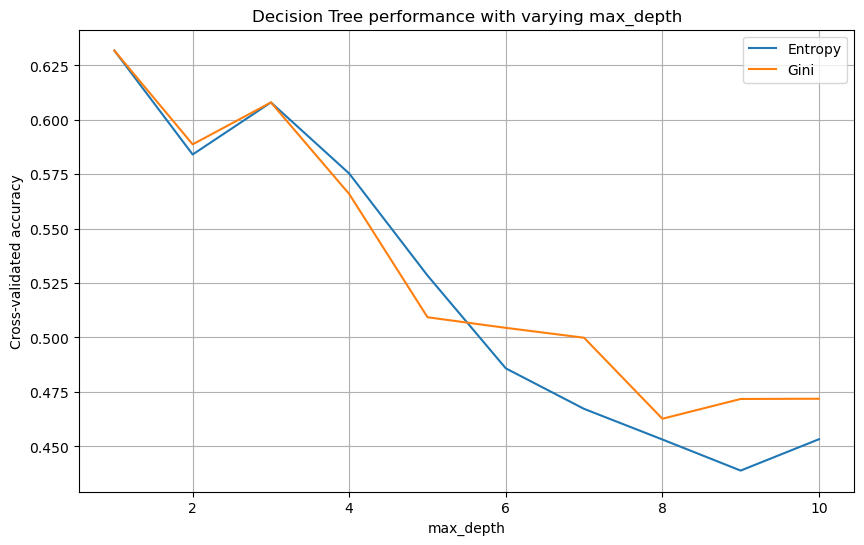

best max-depth entropy: 1
best max-depth for gini: 1


In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

X = heart_disease.drop(['target'], axis=1)  # Features (all columns except 'target')
y = heart_disease['target'].values   

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# initialize variables
max_depths = range(1, 11)
entropy_scores = []
gini_scores = []

# evaluate decision tree models with varying max_depth
for depth in max_depths:
    clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    
    # cross-validation scores
    scores_entropy = cross_val_score(clf_entropy, X_train, y_train, cv=5) # cross val on 5 folds 
    scores_gini = cross_val_score(clf_gini, X_train, y_train, cv=5) # cross val
    
    # store mean accuracy
    entropy_scores.append(scores_entropy.mean()) # plot
    gini_scores.append(scores_gini.mean()) # plot 

# plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, entropy_scores, label='Entropy')
plt.plot(max_depths, gini_scores, label='Gini')
plt.xlabel('max_depth')
plt.ylabel('Cross-validated accuracy')
plt.title('Decision Tree performance with varying max_depth')
plt.legend()
plt.grid(True)
plt.show()

# find the best max_depth for each criterion
best_depth_entropy = max_depths[np.argmax(entropy_scores)]
best_depth_gini = max_depths[np.argmax(gini_scores)]

# best_depth_entropy, best_depth_gini
print(f'best max-depth entropy: {best_depth_entropy}')
print(f'best max-depth for gini: {best_depth_gini}') # they should have about the same score as previous method